<h3 style='text-align: center;'>Physics 2 HW - Forces, Friction & Drag force  🚀</h3>

### 1. Yuval Kogan - 207840042
### 2. Yaniv Bodaga - 314700428

<p dir="rtl">מדדו את כוח הגרר שפועל על רוכב אופניים כתלות במהירות הנסיעה. תוצאות המדידה נרשמו לקובץ f_of_v.dat ניתן לטעון את תוצאות המדידה לתוך המערכים f (שמכיל את מדידות הכוח) ו-v (המהירות) ע"י הפקודות</p>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

pickle_file = open('f_of_v.dat', 'rb')
v, f = pickle.load(pickle_file)
pickle_file.close()

<p dir="rtl">במדידת הכוח יש אי ודאות של Delta_f = 1 N בכל סעיפי השאלה, ניתן להניח כי גלגלי האופניים מתגלגלים ללא החלקה וכי את החיכוך הסטטי ניתן להזניח. ניתן להשתמש בשיטת אוילר לפתרון משוואות דיפרנציאליות. הדיוק הנחוץ הוא של מאית שנייה.</p>

<p dir="rtl">1. הציגו בגרף Errorbar את המדידה של כוח הגרר</p>

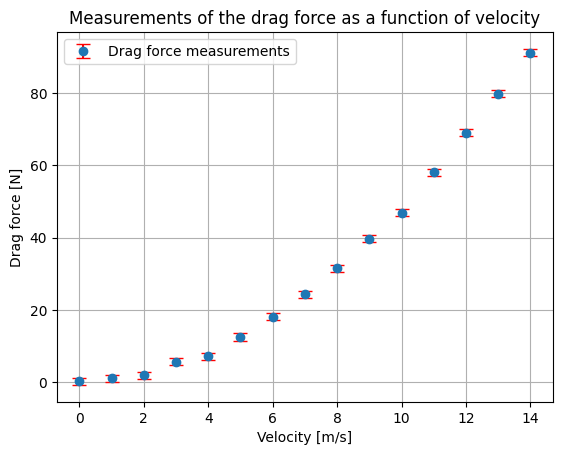

In [29]:
delta_f = 1 # Uncertainty in the measurements

plt.errorbar(v, f, yerr=delta_f, fmt='o', ecolor='red', capsize=5, label='Drag force measurements')
plt.xlabel("Velocity [m/s]")
plt.ylabel("Drag force [N]")
plt.title("Measurements of the drag force as a function of velocity")
plt.grid(True)
plt.legend(loc = "upper left")
plt.show()

<p dir="rtl">2. כוח הגרר הוא מהצורה f_vector = -(bv+cv^2)v^ הציגו על הגרף מן הסעיף הקודם את ההתאמה המיטבית של הביטוי f_vector = -(bv+cv^2)v^ למדידה. האם ההתאמה טובה? מה הם הערכים של b ו-c העולים מן ההתאמה המיטבית? מהי אי הוודאות בערכים אלו?</p>

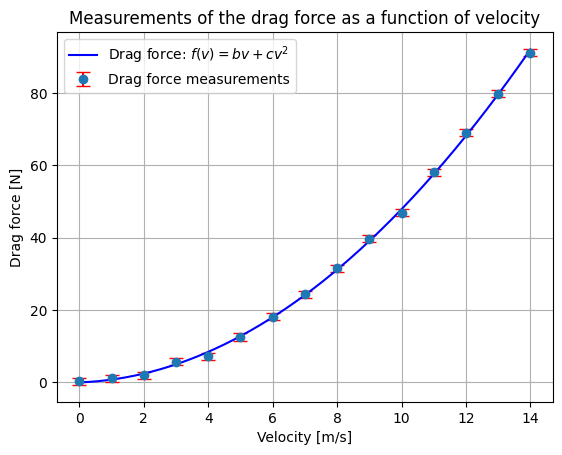

b = 0.33013 ± 0.15934 kg/s
c = 0.44558 ± 0.01098 kg/m


In [30]:
# Helper function, defines the Drag force: f(v) = b*v + c*v^2
def drag_force(v, b, c):
    return b * v + c * v**2

# Get the polynom to represent the drag force
weights = 1 / delta_f  # Weight for each possible error
'''
c = ax^2  deg 2
b = bx    deg 1
a = c*1   deg 0 
'''
(c, b, a), cov = np.polyfit(v, f, deg=2, w=np.full_like(f, weights), cov=True) # Returns the coefficients & covariance matrix

# Create the polynom and error bar and plot them both
plt.errorbar(v, f, yerr=delta_f, fmt='o', ecolor='red', capsize=5, label='Drag force measurements')
v_fit = np.linspace(min(v), max(v), 300)
f_fit = c * v_fit**2 + b * v_fit
plt.plot(v_fit, f_fit, label='Drag force: $f(v) = bv + cv^2$', color='blue')

plt.xlabel("Velocity [m/s]")
plt.ylabel("Drag force [N]")
plt.title("Measurements of the drag force as a function of velocity")
plt.grid(True)
plt.legend(loc = "upper left")
plt.show()

# Calculating uncertainty 
sigma_c = np.sqrt(cov[0, 0])
sigma_b = np.sqrt(cov[1, 1])

print(f"b = {b:.5f} ± {sigma_b:.5f} kg/s")
print(f"c = {c:.5f} ± {sigma_c:.5f} kg/m")

<p dir="rtl">3. מהנדסת, ששמה ציפי, טוענת כי עבור מהירויות שמעל 10 קמ״ש ניתן להזניח את האיבר הלינארי.
כיצד תוכלו להצדיק את טענתה של ציפי? עבור איזו מהירות, לדוגמא, ניתן להזניח את האיבר
הריבועי? עבור איזה מהירות, לדוגמא, לא ניתן לעשות כל הזנחה?</p>

<p dir="rtl">פונקציית כוח הגרר מוגדרת: f(v) = bv + cv^2</p>

<p dir="rtl">לטענת ציפי ניתן להזניח את האיבר הלינארי במהירויות שמעל 10 קמ"ש (בערך 2.78 מ'\שנייה)</p>

<p dir="rtl">על מנת לבדוק מתי ניתן להזניח את אחד האיברים נבצע השוואה ביניהם: 
abs(b\cv) = abs(bv\cv^2)</p>

<p dir="rtl">מכאן ניתן לומר:</p>
<ul dir="rtl">
  <li>ניתן לוותר על האיבר הריבועי כאשר מתקיים v << b/c כלומר האיבר הלינארי גדול משמעותית מהריבועי.</li>
  <li>ניתן לוותר על האיבר הלינארי כאשר מתקיים v >> b/c כלומר האיבר הריבועי גדול משמעותית מהלינארי.</li>
</ul>

<p dir="rtl">לא ניתן להזניח אף אחד מהאיברים כאשר היחס b/cv קרוב מאוד ל-1</p>

<p dir="rtl">לדוג': עבור b=0.8 ו-c=0.6</p>

<p dir="rtl">ניתן גם לתת טווח של מהירויות בהם לא ניתן לעשות כל הזנחה והיא [1.3,3] מ'\שנייה</p>


<p dir="rtl">רוכב אופניים, שהמסה שלו (יחד עם האופניים) היא 75 ק״ג, יורד
בירידה שהשיפוע שלה לאופק היא 8 מעלות, ממהירות התחלתית 0 ומבלי
לדווש.</p>

<p dir="rtl">4. נניח כי כעבור מספיק זמן מהירות הרוכב קבועה. מיצאו את
המהירות הזו. עשו זאת בשתי דרכים: (1) בעזרת ההזנחה
שציפי מציעה. (2) מבלי להזניח את האיבר הלינארי. האם
לצורך חישוב זה ההזנחה של ציפי סבירה?</p>

In [31]:
m = 75 # mass
alpha = 8 # Angle of decline
v0 = 0 # m\s
g = 9.8 # m\s^2

# Method 1: Calculating using the formula: f_dragForce = cv^2
# Used to get the constant velocity when we can drop the linear element
v_approx = np.sqrt((m * g * np.sin(alpha)) / c)
print(f"Constant velocity when dropping the linear factor b: {v_approx:.2f} m/s")

# Method 2: Without dropping any factor f_dragForce = bv + cv^2
# Now, we need to solve quadratic a equation
A = c
B = b
C = -m * g * np.sin(alpha)
discriminant = B**2 - 4 * A * C
v2 = (-B + np.sqrt(discriminant)) / (2 * A)
print(f"Velocity using the drag force formula: {v2:.2f} m/s")

Constant velocity when dropping the linear factor b: 40.40 m/s
Velocity using the drag force formula: 40.03 m/s


<p dir="rtl">בהתחשב בכך שהמהירות שנמצאה בהזנחה של האיבר הלינארי היא 40.4 m/s, והמהירות שנמצאה ללא ההזנחה היא 40.03 m/s, ניתן לראות שההבדל בין שתי המהירויות קטן מאוד. לכן, ניתן להסיק שההזנחה של ציפי <strong>סבירה</strong>, שכן האיבר הלינארי לא משפיע בצורה משמעותית על התוצאה במהירויות גבוהות אלו.</p>

<p dir="rtl">5. מיצאו את מהירות הרוכב כתלות בזמן. ניתן להשתמש בגישה של ציפי לצורך החישוב. הציגו בגרף
את התוצאה. כעבור כמה זמן מהירות הרוכב מגיעה ל 99% מן המהירות שמצאתם בסעיף
הקודם?</p>

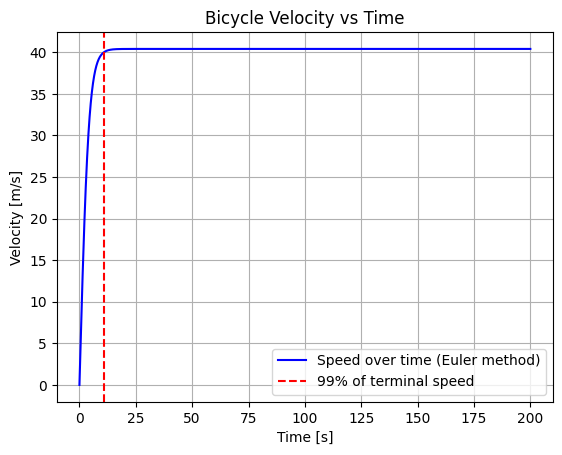

Terminal speed: 40.40 m/s
Time to reach 99% of terminal speed: 10.91 s


In [32]:
# Time parameters
dt = 0.1  # time step [s]
T = 200  # total simulation time [s]
N = int(T / dt)
time = np.linspace(0, T, N)

# Initial conditions
v = np.zeros(N)
v[0] = 0

# Euler integration
for i in range(1, N):
    dv_dt = (m * g * np.sin(alpha) - c * v[i-1]**2) / m
    v[i] = v[i-1] + dv_dt * dt

# Steady state speed (theoretical)
v_terminal = np.sqrt((m * g * np.sin(alpha)) / c)

# Find time when v reaches 99% of terminal speed
v_target = 0.99 * v_terminal
idx_99 = np.argmax(v >= v_target)
t_99 = time[idx_99]

# Plotting
plt.plot(time, v, label='Speed over time (Euler method)', color='blue')
plt.axvline(t_99, color='red', linestyle='--', label='99% of terminal speed')
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")
plt.title("Bicycle Velocity vs Time")
plt.legend()
plt.grid(True)
plt.show()

# Output result
print(f"Terminal speed: {v_terminal:.2f} m/s")
print(f"Time to reach 99% of terminal speed: {t_99:.2f} s")

<p dir="rtl">6. בסוף הירידה הרוכב מגיע לישורת. המהירות ההתחלתית שלו בישורת היא 30 קמ״ש. גם בישורת
רוכב האופניים אינו מדווש. מהו המרחק שיעבור הרוכב עד לעצירתו? ענו על השאלה בשתי
דרכים: (1) בעזרת ההזנחה שציפי מציעה. (2) מבלי להזניח את האיבר הלינארי. האם לצורך
חישוב זה ההזנחה של ציפי סבירה?</p>

In [33]:
v0 = 30 / 3.6 # km/hour -> m/s --> divide by 1000 meters/3600 seconds
v_final = 0.01 * v0 # Approximately zero 

# Method 1: Distance without the linear factor
x_without_the_linear_factor = (m / c) * np.log(v0 / v_final)

# Method 2: Distance using the drag force formula
numerator = (v0 / (b + c * v0)) * ((b + c * v_final) / v_final)
x_full_formula = (m / b) * np.log(numerator)

print(f"Distance without the linear factor: {x_without_the_linear_factor:.2f} m")
print(f"Distance with full drag force: {x_full_formula:.2f} m")

Distance without the linear factor: 775.15 m
Distance with full drag force: 501.26 m


<p dir="rtl">בהתחשב בכך שהמרחק ללא האיבר הלינארי הוא 775.15 מטר, ולעומתו המרחק עם הנוסחה המלאה הוא 501.26 מטר, הפער משמעותי. לכן, ההזנחה של ציפי במקרה זה <strong>אינה סבירה</strong>, ויש לקחת את שני האיברים בחשבון כדי לקבל תוצאה מדויקת במהירויות נמוכות יחסית.</p>

### 1. Yuval Kogan - 207840042
### 2. Yaniv Bodaga - 314700428